# Tarefa, manipulação de contornos paramétricos

Imagens NIST

## Load database

In [1]:
import sys
sys.path.append('../')
import sarpy.binaryScale 
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import load_nist
from sarpy import extractContours
from sarpy import plotContour
from math import *
from scipy.misc import imresize

dataset = load_nist()
%load_ext autoreload
%autoreload 2

print(len(dataset['bitmaps']), "images")
print(len(dataset['names']), "class")

6200 images
62 class


## Funções auxiliares

- Função para visualizar grid de imagens

In [2]:
def gridVisualize(data, ncols,size, fun_apply):
    plt.rcParams["figure.figsize"] = (size[0],size[1])
    x = ncols;
    y = int(np.floor(len(data)/x))
    fig = 0
    axes = 0
    if y <= 1:
        y = 1
        fig, axes = plt.subplots(1,x)
    else:
        fig, axes = plt.subplots(y+1,x)    
    k = 0
    for i in range(0,y+1):
        for j in range(0,x):
            if i*x+j < len(data):                
                if y <= 1:
                    axes[j].axis('off')
                    axes[j].imshow(fun_apply(data[k]),cmap='gray')
                else:
                    axes[i,j].axis('off')
                    axes[i,j].imshow(fun_apply(data[k]),cmap='gray')
                k = k + 1
            else:
                if y <=1 :
                    axes[j].axis('off')
                else:
                    axes[i,j].axis('off')                
    plt.show()

    
def fun(c,l=100): #problem type extractContours.extract_contours
    nrows = c.shape[0]
    a = np.array([0,0,0])
    for i in c[:]:
        a = np.vstack((a,i))
    a = a[1::]    
    b = np.array(a[0])
    for i in range(1,l):
        idx = int(np.floor(nrows*i/l))
        b = np.vstack((b,a[idx]))
    return b

f_iden = lambda arg1 : arg1;

## Normalizaçaõ de imagens
    - Tamanho: Normalização pela meia aritmetica das dimenções 2D

In [3]:
def getBMnormalized(list_images):
    #print("Original images")
    #gridVisualize(list_images,6,(10,5),f_iden)
    list_bm     = []
    list_normal = []    
    for img in list_images:
        cc = extractContours.extract_contours(img)[0]
        smin = np.min(cc,axis=0)
        smax = np.max(cc,axis=0)
        xx = img[smin[1]:smax[1]+1,smin[2]:smax[2]+1] # limit 1 pixel error
        list_bm.append(xx)
    
    print("Shapes")
    gridVisualize(list_bm,6,(10,5),f_iden)
    
    a = np.asarray([0,0])
    for img in list_bm:
        a = img.shape + a    
    a = a/len(list_bm) 
    
    for img in list_bm:
        #list_normal.append(shapeScale2(img,(a[0],a[1])))    
        t = imresize(img,(floor(a[0]),floor(a[1])),'nearest','L')
        t = np.where(t > 0 , 1, 0)  
        list_normal.append(t)

    print("Shapes normalized")
    gridVisualize(list_normal,6,(10,5),f_iden)
    return list_normal

## Normalizaçaõ dos contornos pelo perimetro
    - Os contornos são normalizados pelo perimetro meio, assim são obtidos uma quantidade fixa de pontos 

In [4]:
def getCTnormalized(list_images):
    sum_peri = 0
    list_contours = []
    for img in list_images:
        aContour = extractContours.extract_contours(img)
        sum_peri = sum_peri + len(aContour[0])
        list_contours.append(aContour[0])
               
    n_steps = int(sum_peri/len(list_contours))
    arr_x = np.arange(0,n_steps)
    array_contours = np.asarray(list_contours)
    
    print("Contours")
    gridVisualize(array_contours,6,(10,5),plotContour.contour2bm)
    
    for i in range(0,len(array_contours)):        
        c = fun(array_contours[i],n_steps)
        c = c - np.min(c,axis=0)
        array_contours[i] = np.array(c)        
    return array_contours 

## Visualização da meia dos contornos e o desvio padrão

    - Calcula a média aritmética para os eixos X e Y do contorno parametrico
    - Calcula a desvio padrão para os eixos X e Y do contorno parametrico

In [5]:
def plotVisualizeMeanStd(array_contours):   
    mm   = np.mean(array_contours,axis=0)
    std  = np.std(array_contours,axis=0)    
    mm_n = mm - np.min(mm,axis=0)
    size = np.max(mm_n,axis=0)    
    arr_x = np.arange(0,len(array_contours[0]))    
    
    print("Arithmetic mean contour")
    img_mm = np.zeros((int(size[1])+1,int(size[2])+1))
    for b in mm_n:
        img_mm[int(b[1])][int(b[2])] = 1
    plt.imshow(img_mm,cmap='gray')
    plt.axis('off')
    plt.show()
    
    plt.rcParams["figure.figsize"] = [15,6]
    for idx,title in zip([1,2],["Pontos do contorno, coord X","Pontos do contorno, coord Y"]):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for contour in array_contours:
            ax.plot(arr_x, contour[:,idx])        
        ax.plot(arr_x, mm[:,idx],'+', color="black",label='mean')
        plt.title(title)
        plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7,label='std')
        
        legend = ax.legend(loc='upper center', shadow=True)
        frame = legend.get_frame()
        plt.show()

## Mostra resultados para diferentes conjuntos de imagens


*******
**
  Images for label 0 
**
*******
Shapes


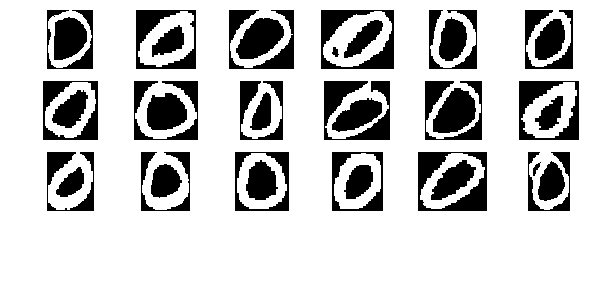

Shapes normalized


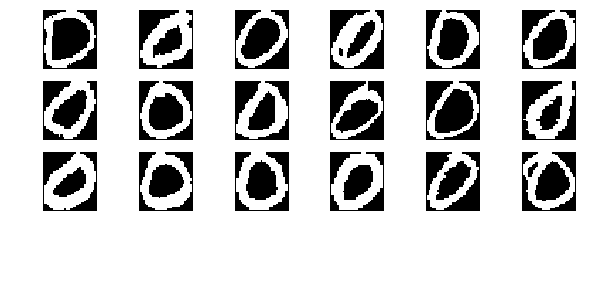

Contours


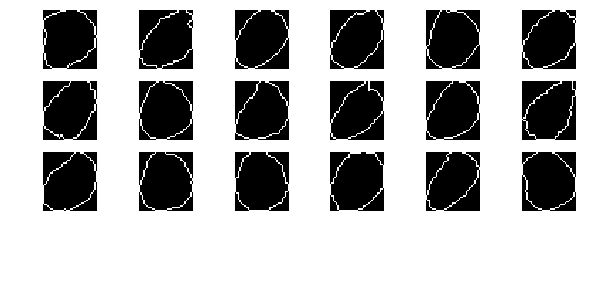

Arithmetic mean contour


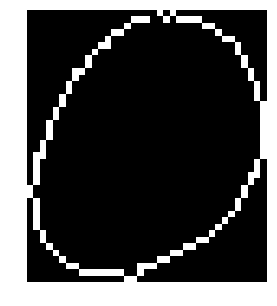

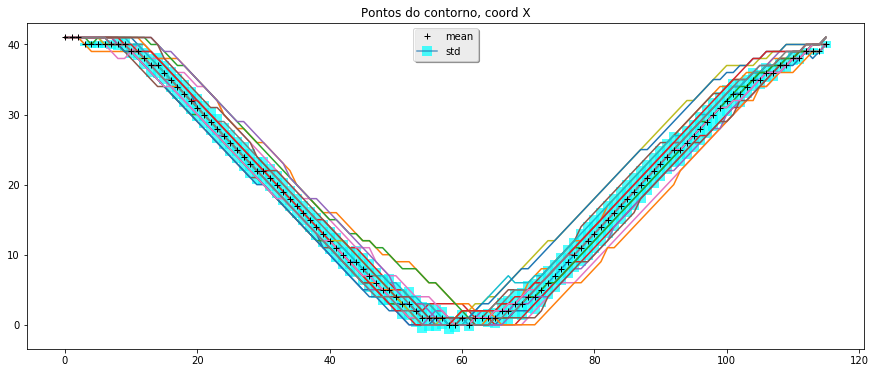

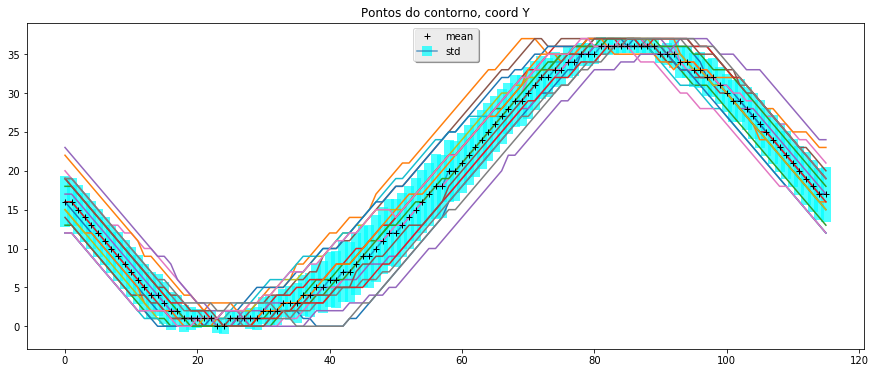


*******
**
  Images for label F 
**
*******
Shapes


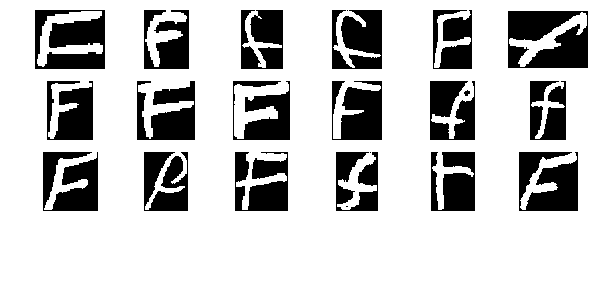

Shapes normalized


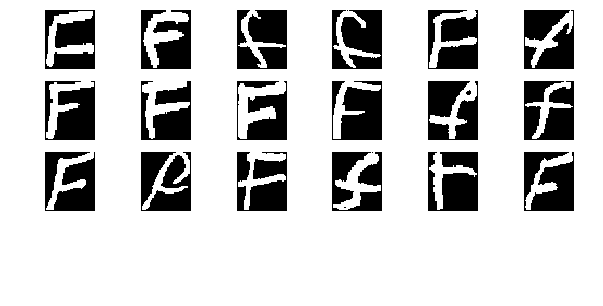

Contours


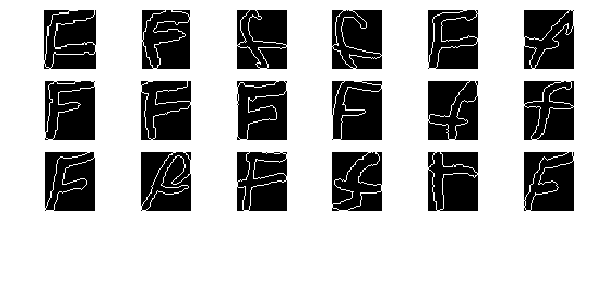

Arithmetic mean contour


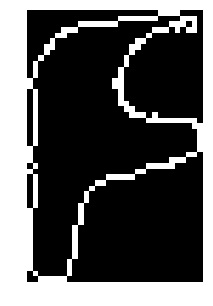

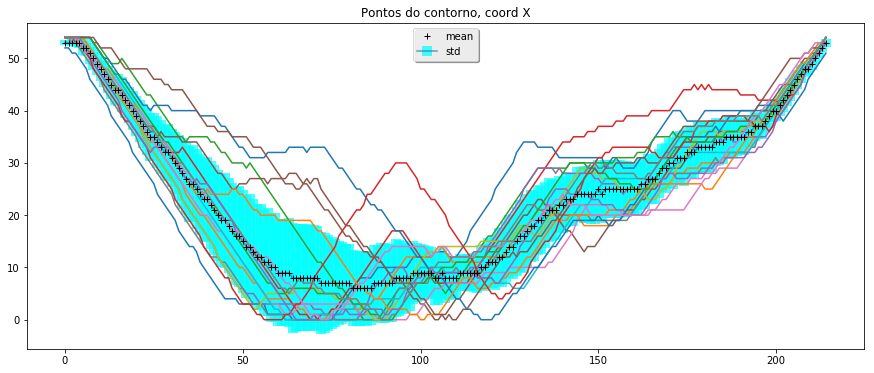

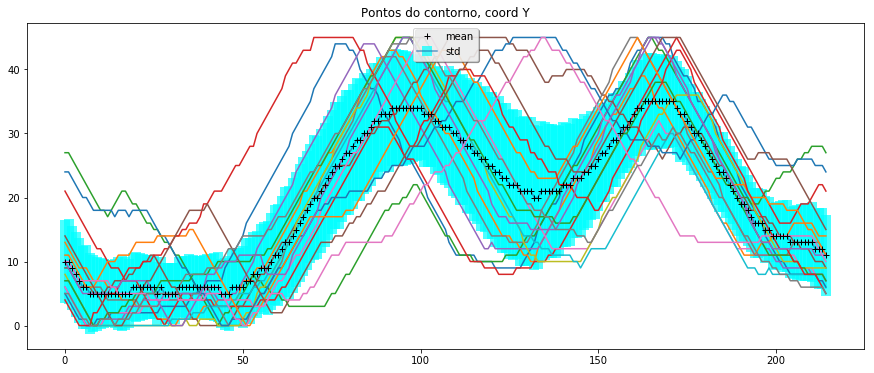


*******
**
  Images for label U 
**
*******
Shapes


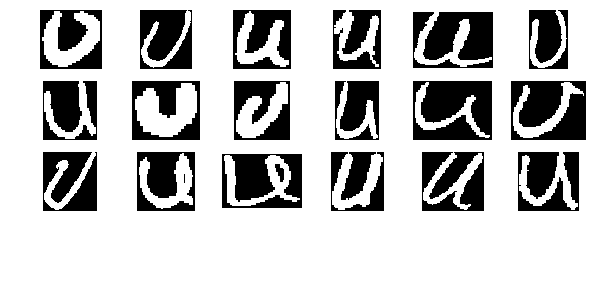

Shapes normalized


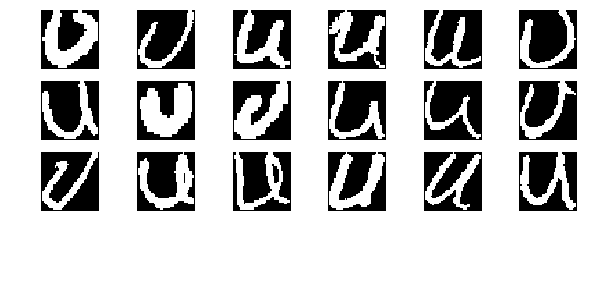

Contours


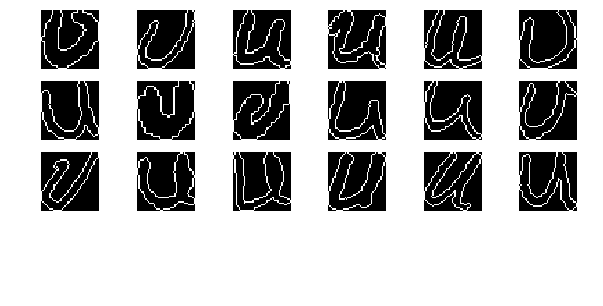

Arithmetic mean contour


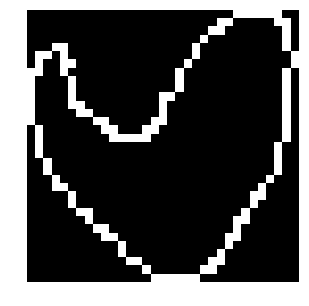

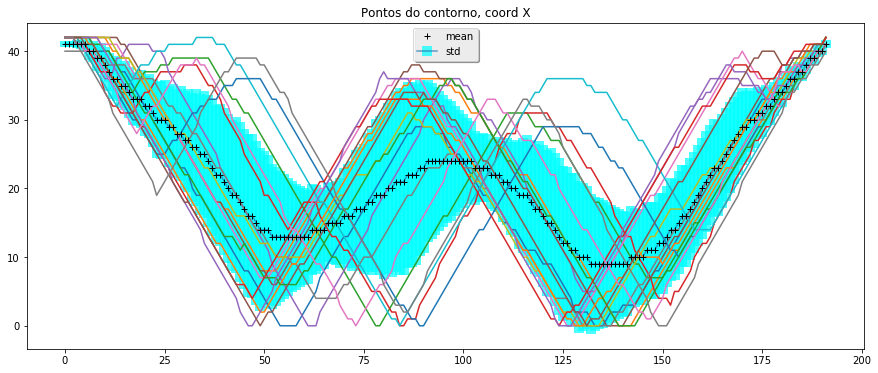

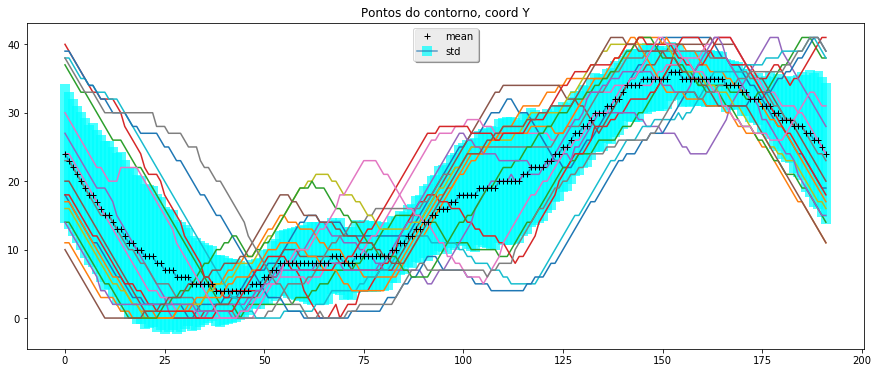


*******
**
  Images for label j 
**
*******
Shapes


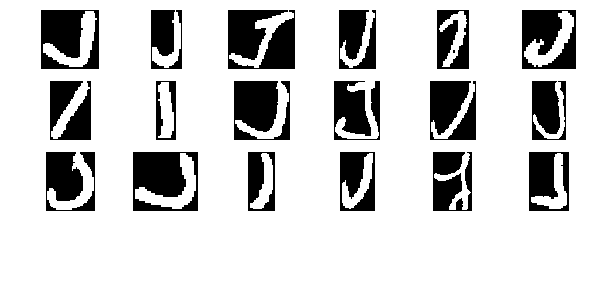

Shapes normalized


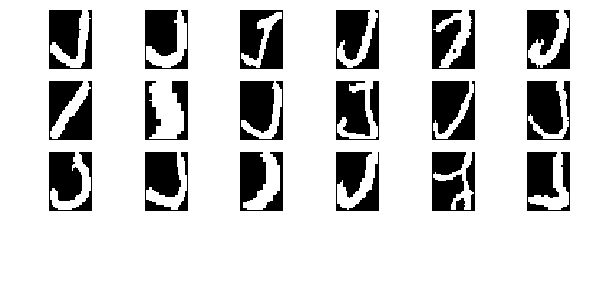

Contours


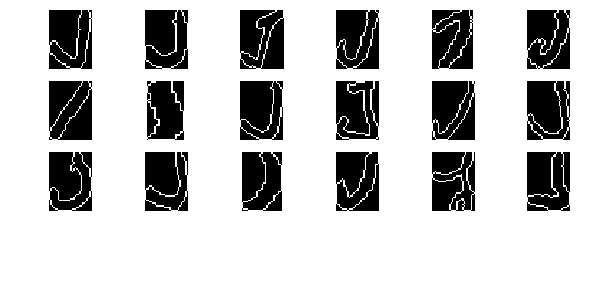

Arithmetic mean contour


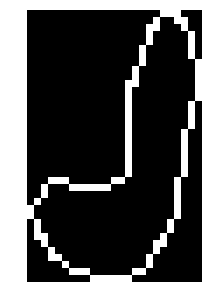

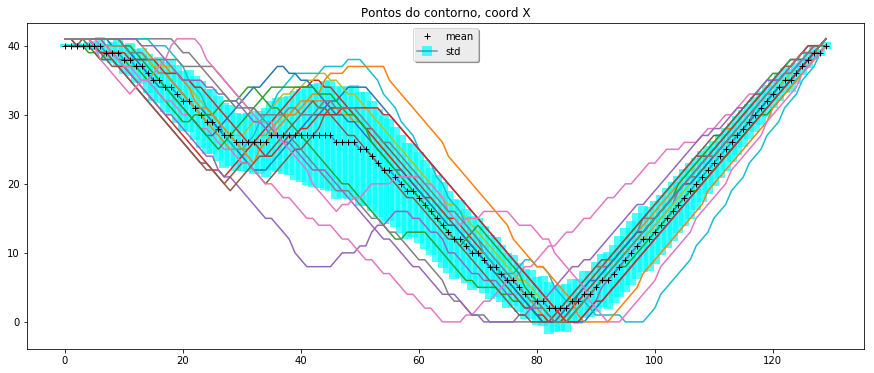

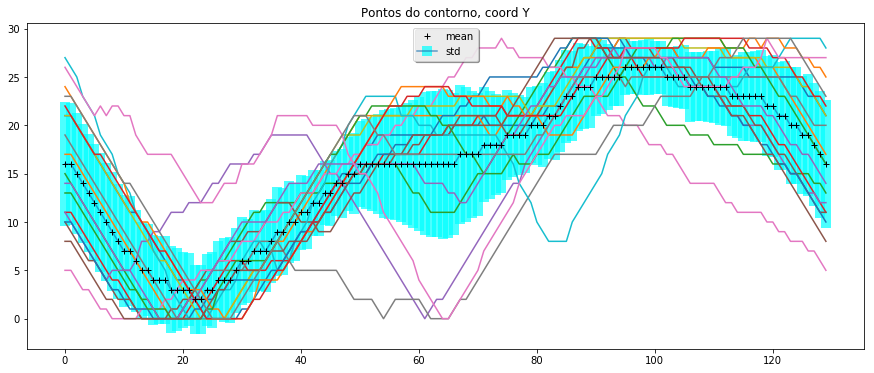


*******
**
  Images for label y 
**
*******
Shapes


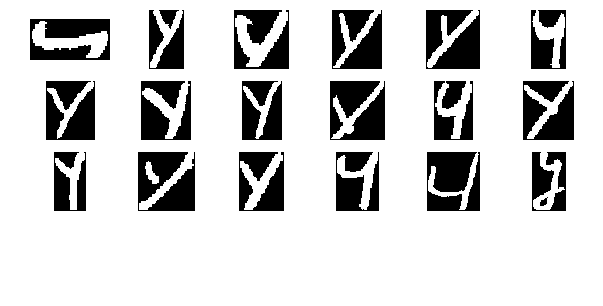

Shapes normalized


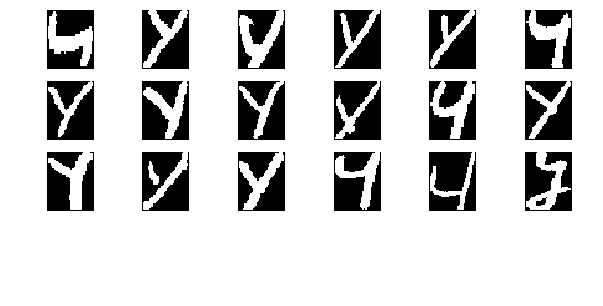

Contours


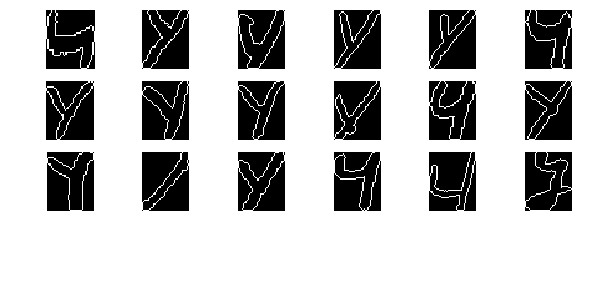

Arithmetic mean contour


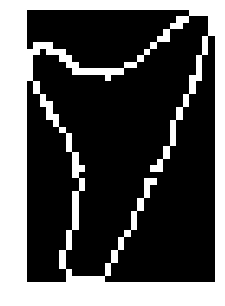

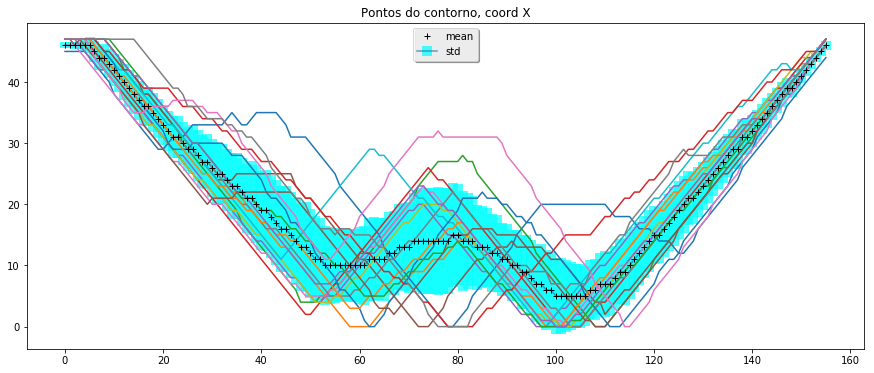

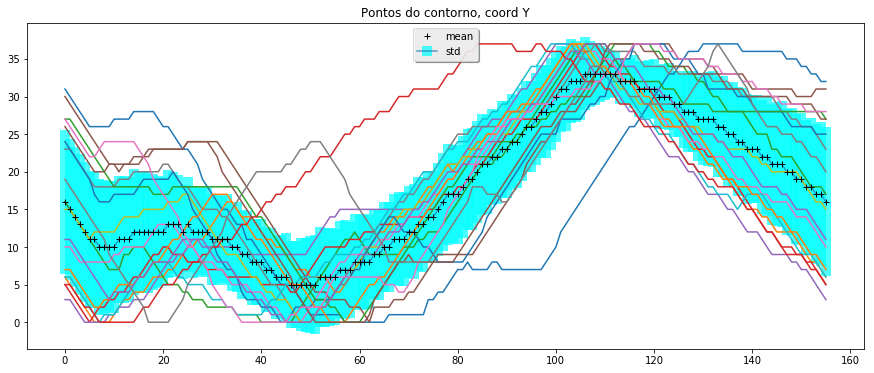

In [6]:
"""
#
# Example para imagens aleatórias 
#
"""    
for c in range(0,62,15):
    list_images = [];
    for i in range(c*100,c*100+18):
        list_images.append(dataset['bitmaps'][i])
    
    
    
    print("\n*******\n**\n  Images for label", dataset['names'][dataset['targets'][c*100]],"\n**\n*******")
    images_normal = getBMnormalized(list_images)
    contornos_normal = getCTnormalized(images_normal)    
    plotVisualizeMeanStd(contornos_normal)